<center>

*******************************************************************************************
    
### Visualisation of Nasdaq Nordic Stocks priced in Euros
  
#####  10 July 2024

##### Juan Ignacio Mendoza Garay  

*******************************************************************************************

</center>

##### INFORMATION:

* Description:

    Visualisation of historical prices from stocks traded in Euros at Nasdaq Nordic, grouped by Industry and Supersector
>
* Rationale:
  
    Plots of several stocks' prices rescaled to a fixed interval quickly reveal local and global trends. For example, a trend in the market will show for all or most of the stocks. What is relevant in this visualisation is the changes of the prices, not the exact prices.
>
* Data dependencies:

  A SQLite database having the following tables:
    * nn_list:\
    From the stocks list xlsx file with substring 'the-nordic-list' in its file name, which can be downloaded from https://www.nasdaqomxnordic.com/shares .

    * av_prices:\
    The average historical prices for stocks traded in Euros. from the CSV file that can be downloaded from each stock's page. The links are in the table in the page of the URL address that appears above.  
 >
    The code to produce the tables from the downloaded files may be found in the file 'Correlation_Nasdaq_Nordic.ipynb'.
>
* Instructions:

    Edit the values indicated with an arrow like this: <---  
    Comment/uncomment or change values as suggested by the comments.  
    Run the program, close your eyes and hope for the best.  

*******************************************************************************************


In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

***
### Set paths

In [280]:
data_folder = r"C:\Users\Daneel_Olivaw\Documents\nn_data" # <--- directory for files (e.g. stocks list, database)
stocks_folder = data_folder + r"\stocks" # <--- directory for CSV files with historical data
db_fn = data_folder + r'\nn_data.db' # <--- database file name (full path)

***
### Group stocks according to Industry and Supersector

In [4]:
# Conncet to database:

connection = sqlite3.connect(db_fn)
cursor = connection.cursor()

In [38]:
# Print column names of a table:

cursor.execute( f'SELECT * FROM nn_list LIMIT 1' )
print(', '.join([row[0] for row in cursor.description]))

index, Instrument Name, Short Name, ISIN, Listing Date, Exchange, Issuer Organization Name, Org Code, Currency, Segment, Issuer Country, Industry Code, Industry, Supersector Code, Supersector


In [39]:
# Print column names of a table:

cursor.execute( f'SELECT * FROM av_prices LIMIT 1' )
print(', '.join([row[0] for row in cursor.description]))

Date, ACG1V, AFAGR, AKTIA, ALBAV, ALBBV, ALISA, ALMA, ANORA, APETIT, ASPO, ATRAV, BIOBV, BITTI, BOREO, CAPMAN, CAV1V, CGCBV, CONSTI, CTH1V, CTY1S, DIGIA, DIGIGR, DOV1V, EEZY, ELEAV, ELISA, ENENTO, EQV1V, ESENSE, ETTE, EVLI, EXL1V, FIA1S, FORTUM, FSECURE, FSKRS, GLA1V, GOFORE, HARVIA, HKFOODS, HONBS, HUH1V, ICP1V, IFA1V, ILKKA2, INVEST, KAMUX, KCR, KELAS, KEMIRA, KESKOA, KESKOB, KHG, KNEBV, KOJAMO, KOSKI, KREATE, KSL, LAMOR, LAT1V, LEHTO, LINDEX, LL1SPAC, MANTA, MARAS, MEKKO, METSA, METSB, METSO, MUSTI, NDA FI, NESTE, NLG1V, NOHO, NOKIA, OKDAV, OKDBV, OLVAS, OMASP, OPTOMED, ORNAV, ORNBV, ORTHEX, OUT1V, OVARO, PAMPALO, PIHLIS, PNA1V, PON1V, PUMU, PURMO, PUUILO, QPR1V, QTCOM, RAIVV, RAP1V, RAUTE, REG1V, REKA, RELAIS, REMEDY, ROBIT, SAGCV, SAMPO, SANOMA, SCANFL, SIILI, SITOWS, SOLTEQ, SOSI1, SRV1V, SSABAH, SSABBH, SSH1V, STEAV, STERV, SUY1V, TAALA, TALLINK, TELIA1, TEM1V, TIETO, TLT1V, TNOM, TOKMAN, TRH1V, TTALO, TULAV, TYRES, UNITED, UPM, VAIAS, VALMT, VALOE, VERK, VIK1V, WETTERI, WITH, W

In [11]:
# Count stocks grouped by Industry and Supersector:

query = """ 
            SELECT "Industry Code", Industry, "Supersector Code", Supersector, COUNT() as count
            FROM 'nn_list'
            WHERE Currency = 'EUR'
            GROUP BY Industry, Supersector
        """
sec_groups_df = pd.read_sql_query(query, connection)
print(sec_groups_df.shape)
sec_groups_df

(20, 5)


,Industry Code,Industry,Supersector Code,Supersector,count
0,55,Basic Materials,5510,Basic Resources,13
1,55,Basic Materials,5520,Chemicals,1
2,40,Consumer Discretionary,4010,Automobiles and Parts,2
3,40,Consumer Discretionary,4020,Consumer Products and Services,9
4,40,Consumer Discretionary,4030,Media,5
5,40,Consumer Discretionary,4040,Retail,7
6,40,Consumer Discretionary,4050,Travel and Leisure,4
7,45,Consumer Staples,4510,"Food, Beverage and Tobacco",6
8,45,Consumer Staples,4520,"Personal Care, Drug and Grocery Stores",3
9,60,Energy,6010,Energy,1


In [57]:
data_df = pd.read_sql_query('SELECT * FROM av_prices', connection)
data_df['Date'] = pd.to_datetime(data_df['Date'])
data_df.set_index('Date', inplace = True)
data_df.head()

,ACG1V,AFAGR,AKTIA,ALBAV,ALBBV,ALISA,ALMA,ANORA,APETIT,ASPO,...,VAIAS,VALMT,VALOE,VERK,VIK1V,WETTERI,WITH,WRT1V,WUF1V,YIT
Date,,,,,,,,,,,,,,,,,,,,,
2024-06-26,3.110,0.285,9.260,33.818,33.357,0.185,10.337,4.556,13.734,5.915,...,40.926,26.796,NaN,2.203,22.420,0.434,1.045,17.839,2.586,2.278
2024-06-25,3.053,0.282,9.349,34.352,33.447,0.184,10.210,4.520,13.842,5.867,...,41.388,26.929,NaN,2.204,22.070,0.430,1.054,18.385,2.406,2.326
2024-06-24,3.177,0.282,9.324,34.200,33.347,0.183,10.101,4.505,13.760,5.877,...,41.356,27.463,NaN,2.200,22.372,0.436,1.075,18.371,2.414,2.366
2024-06-20,3.091,0.278,9.360,34.329,33.558,0.183,9.944,4.500,14.048,5.851,...,40.798,26.935,NaN,2.192,22.272,0.438,1.075,18.486,2.450,2.409
2024-06-19,3.109,0.272,9.317,34.093,33.383,0.185,9.873,4.499,14.029,5.888,...,39.944,26.706,NaN,2.188,22.201,0.435,1.086,19.070,2.457,2.427


***
### Plots of rescaled prices grouped by Industry and Supersector

These tickers were not found in table "av_prices":
 EXL1VN0124


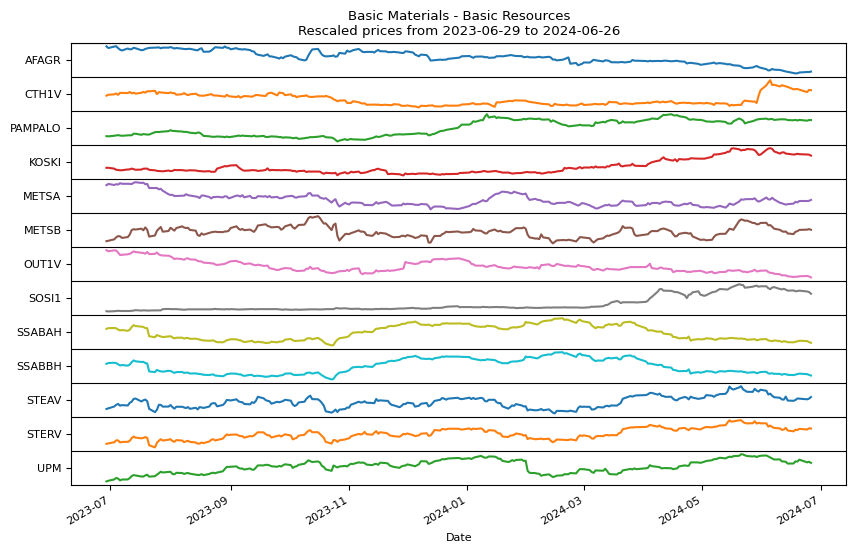

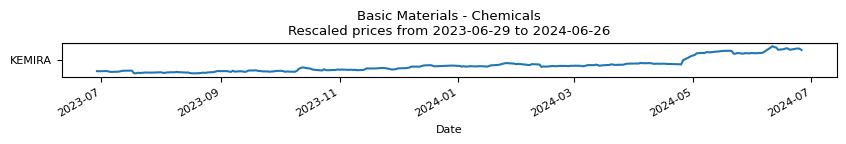

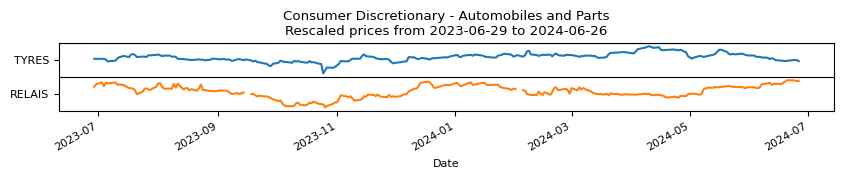

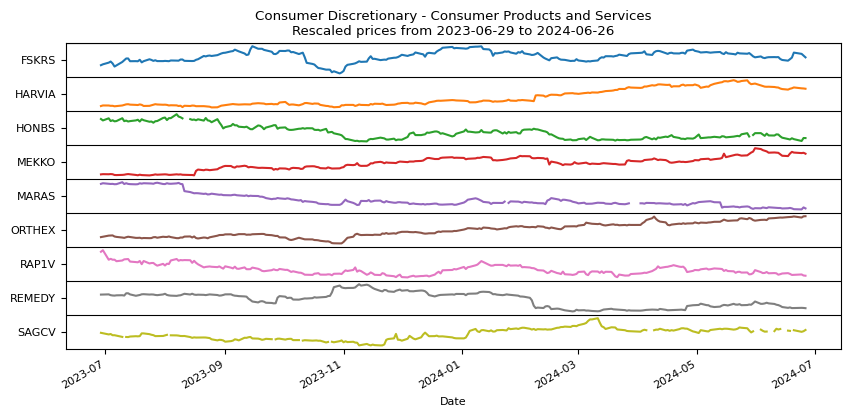

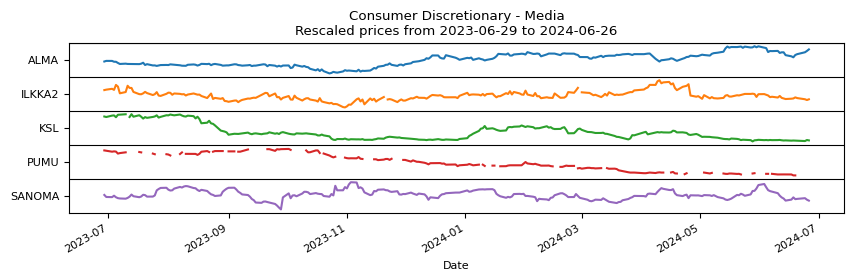

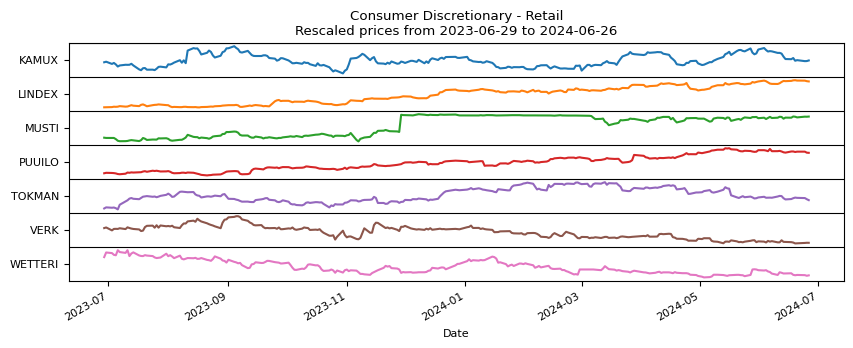

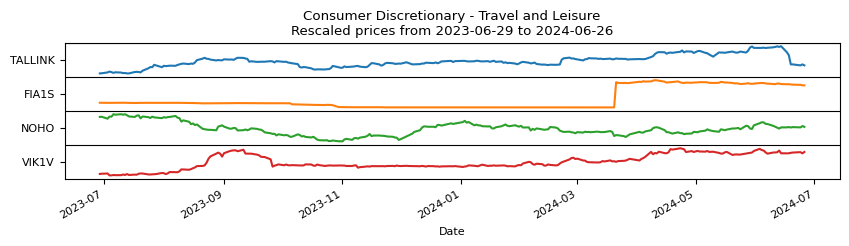

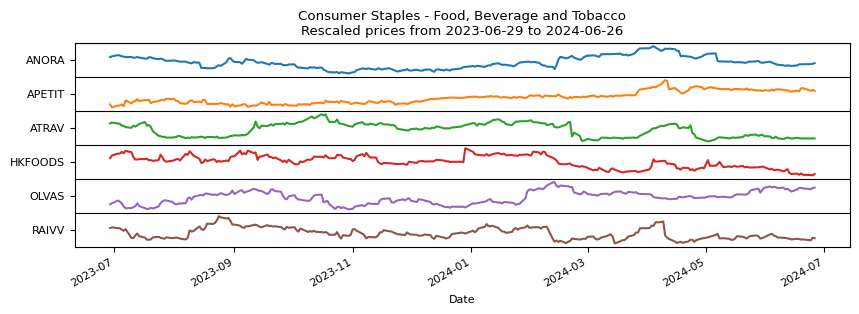

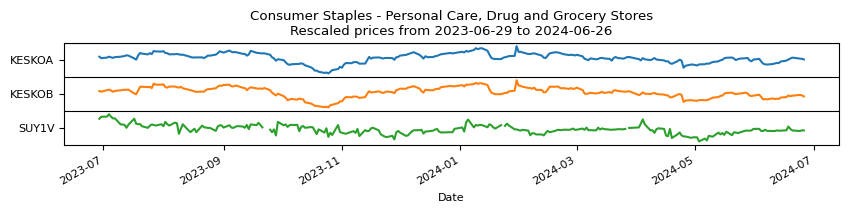

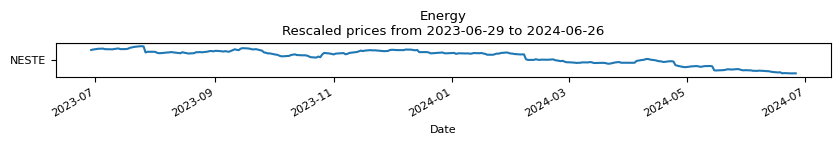

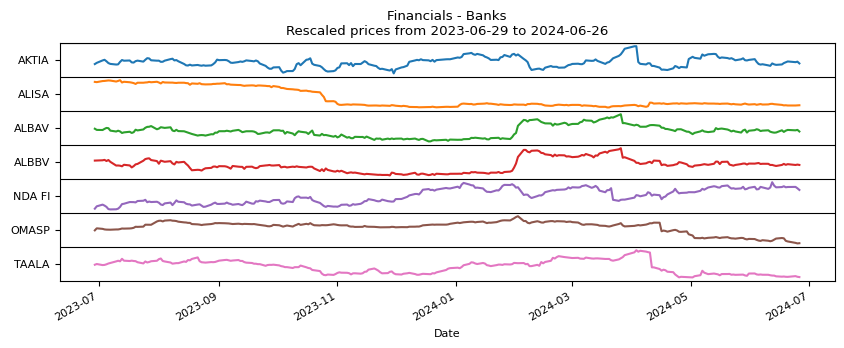

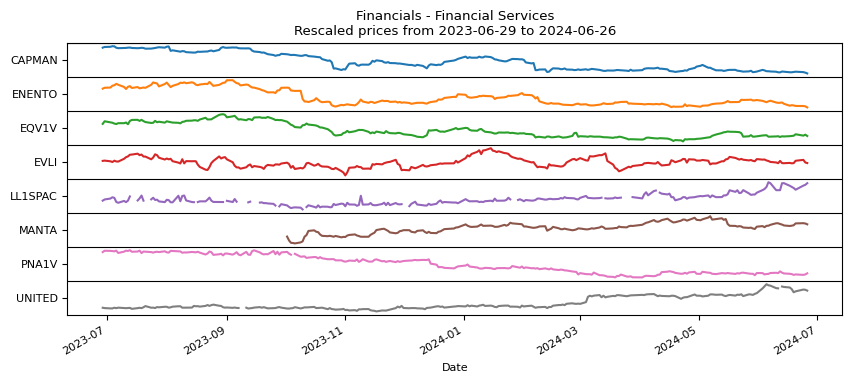

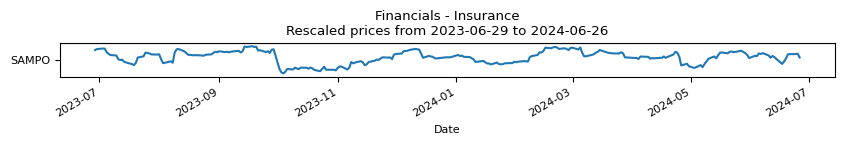

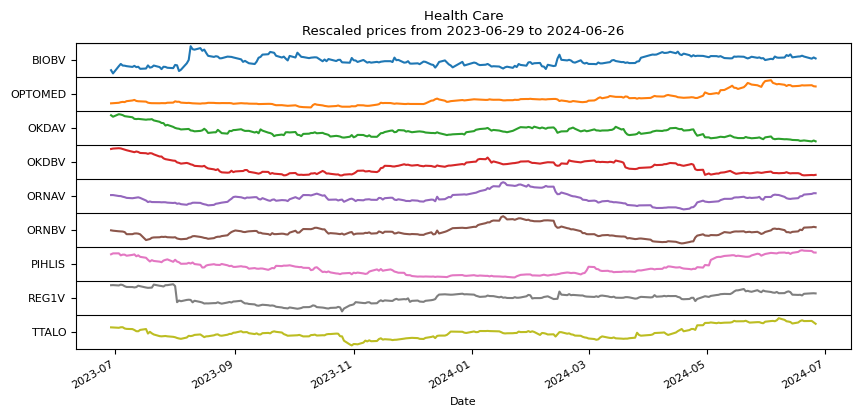

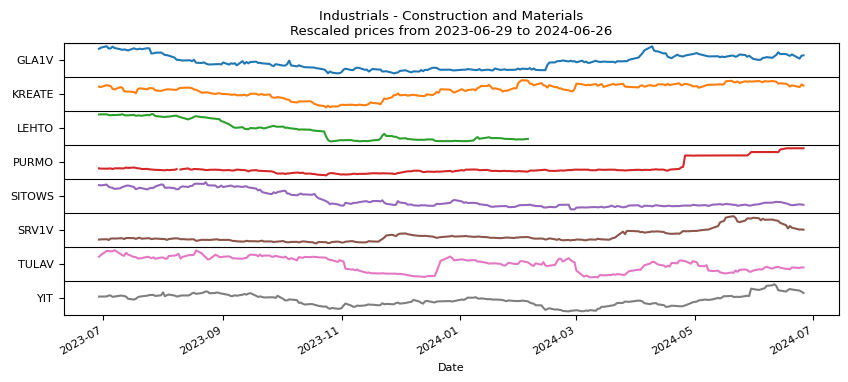

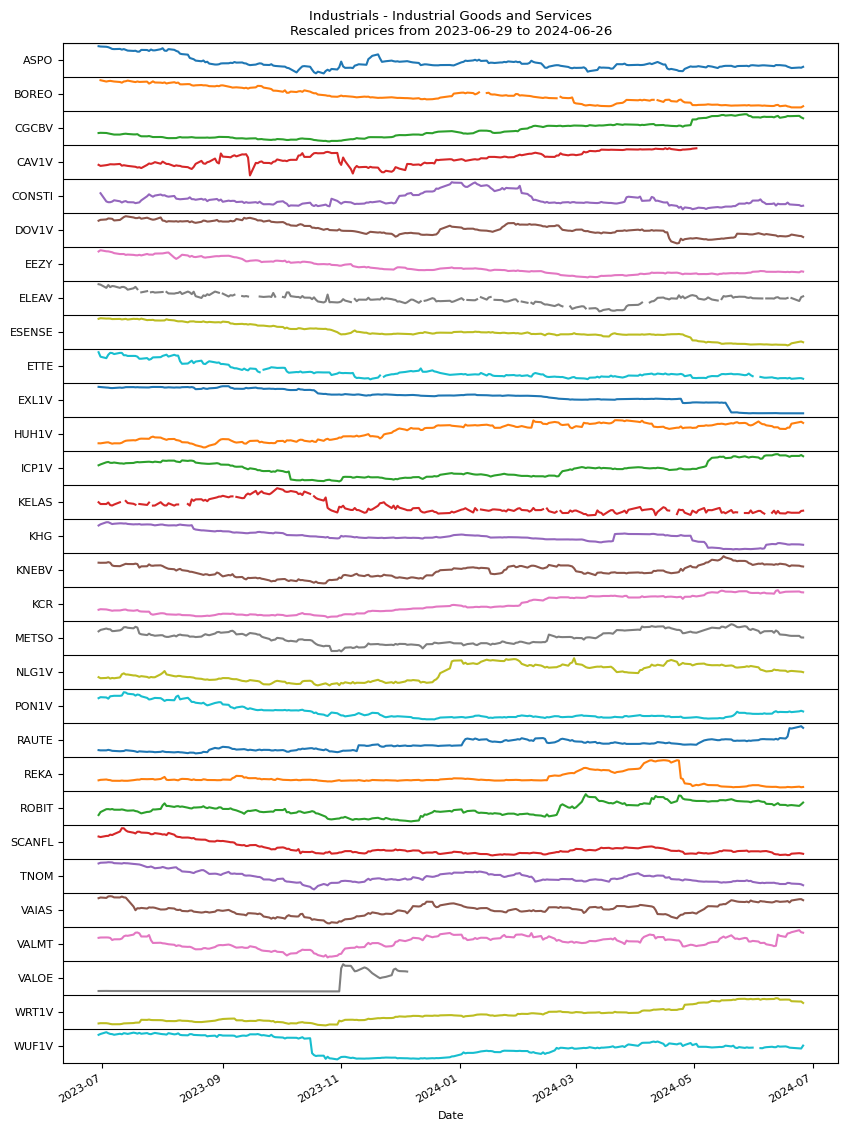

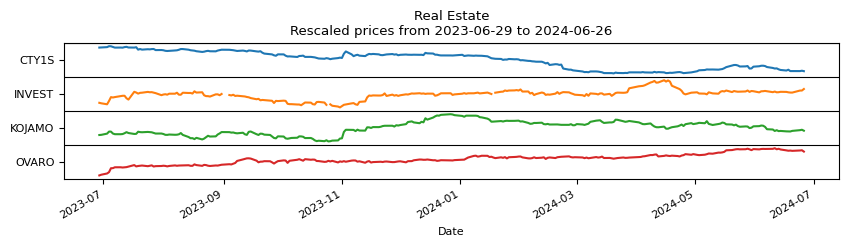

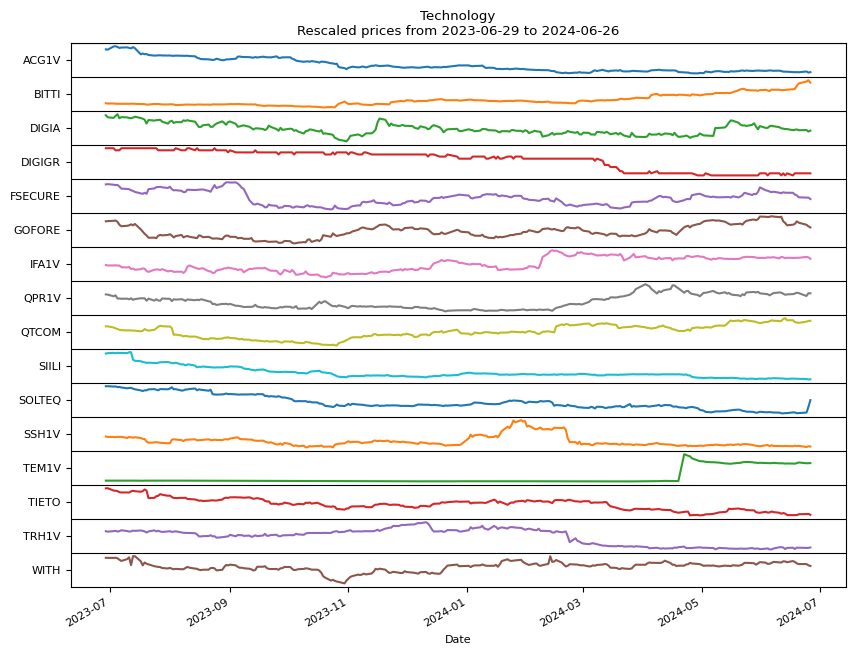

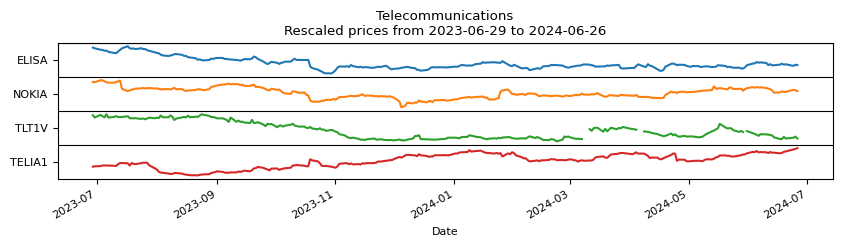

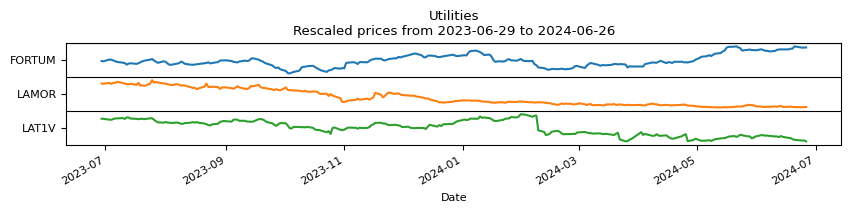

In [278]:
start_date = '' # <--- inclusive start date, '' = from first data point in database
end_date = ''   # <--- inclusive end date, '' = until last data point in database

tickers_not_found = []

for i_supersector in range(sec_groups_df.shape[0]):

    if sec_groups_df.iloc[i_supersector,1] == sec_groups_df.iloc[i_supersector,3] :
        issector_lbl = sec_groups_df.iloc[i_supersector,1]
    else:
        issector_lbl = ' - '.join( sec_groups_df.iloc[i_supersector,[1,3]] )
    
    # Get tickers for this group from table 'nn_list':
    ssc = sec_groups_df.loc[i_supersector,'Supersector Code']
    query = f""" 
                SELECT "Short Name"
                FROM nn_list
                WHERE Currency = "EUR" AND "Supersector Code" = {ssc}
            """
    q_stocks = pd.read_sql_query(query, connection)
    
    # Check if queried stocks exist in table 'av_prices':
    sel_stocks = []
    for t in q_stocks["Short Name"]:
        if t in data_df.columns:
            sel_stocks.append(t)
        else:
            if t not in tickers_not_found:
                tickers_not_found.append(t)
                
    # Select data from table 'av_prices' and plot:
    if not start_date:
        start_date = data_df.index[-1].strftime('%Y-%m-%d')
    if not end_date:
        end_date = data_df.index[0].strftime('%Y-%m-%d')
    sel_df = data_df.query('index >= @start_date and index <= @end_date')[sel_stocks].copy()
    col_names = sel_df.columns
    sel_df = sel_df - sel_df.min()
    sel_df = sel_df / sel_df.max()
    for i in range(sel_df.shape[1]):
        sel_df.iloc[:,i] = ( sel_df.iloc[:,i] * 0.8 ) - (i+0.9)
    plt.rcParams.update({'font.size':8})
    fig_height = sel_df.shape[1] / 2
    fig, ax = plt.subplots(figsize=(10,fig_height))
    sel_df.plot( ax = ax )
    ax.get_legend().remove()
    ax.set_title(f'{issector_lbl}\nRescaled prices from {start_date} to {end_date}')
    ax.set_ylim([-sel_df.shape[1],0]);
    h_lines = range(0,-sel_df.shape[1],-1)
    [ax.axhline(y=i, linestyle='-', linewidth=0.8,color='k') for i in h_lines]
    y_ticks = [v-0.5 for v in h_lines]
    ax.set_yticks(y_ticks, labels = col_names );

if tickers_not_found:
    print('These tickers were not found in table "av_prices":\n',', '.join(tickers_not_found))

In [34]:
connection.close()